In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
from google.colab import drive
import os
import keras
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [8]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D,
    ZeroPadding2D,
    MaxPooling2D,
    Dense,
    Dropout,
    Flatten,
    Activation
)
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import imagenet_utils


# use pre-taining model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
# the path of the download weights
model.load_weights('/content/drive/My Drive/Colab Notebooks/face_face/vgg_face_weights.h5')


In [9]:
# get the embedding layer of VGG
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
vgg_face_descriptor.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 226, 226, 3)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 226, 226, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 114, 114, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_4                │ (None, 114, 114, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_5                │ (None, 58, 58, 128)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_6                │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_7                │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_8                │ (None, 30, 30, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_9                │ (None, 30, 30, 512)    │             

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:

import os

!Is "/content/drive/My Drive/Colab Notebooks"
list_image = []
dic_image = {}
index = 0
key_index =[]
# read all the image
for filename in os.listdir(r"/content/drive/My Drive/Colab Notebooks/face"):
    try:
        filepath = os.path.join("/content/drive/My Drive/Colab Notebooks/face", filename)
        original = load_img(filepath, target_size=(224,224))
        dic_image[index] = original

        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = imagenet_utils.preprocess_input(image_batch)

        predictions = vgg_face_descriptor.predict(processed_image)

        print(f"Index {index}, predictions shape: {predictions.shape}")

        list_image.append(predictions[0])
        key_index.append(index)

        index += 1
    except Exception as e:
        print(f"Error processing {filename}: {e}")


/bin/bash: line 1: Is: command not found
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
Index 0, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Index 1, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Index 2, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
Index 3, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Index 4, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
Index 5, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
Index 6, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Index 7, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Index 8, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
Index 9, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Index 10, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
Index 11, predictions shape: (1, 2622)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/st

In [26]:
import cv2
import os
import math

input_folder = "/content/drive/My Drive/Colab Notebooks/image"
output_folder = "/content/drive/My Drive/Colab Notebooks/Cropped_image"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

crop_size = 90  # 每个小块尺寸

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(input_folder, filename)
        img = cv2.imread(filepath)

        h, w, _ = img.shape

        rows = math.ceil(h / crop_size)
        cols = math.ceil(w / crop_size)

        base_name, ext = os.path.splitext(filename)

        for i in range(rows):
            for j in range(cols):
                y1 = i * crop_size
                y2 = min((i + 1) * crop_size, h)
                x1 = j * crop_size
                x2 = min((j + 1) * crop_size, w)

                cropped = img[y1:y2, x1:x2]

                save_name = f"{base_name}_{i}_{j}{ext}"
                save_path = os.path.join(output_folder, save_name)

                cv2.imwrite(save_path, cropped)
                print(f"Saved {save_path}")


Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_0_0.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_0_1.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_0_2.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_0_3.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_1_0.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_1_1.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_1_2.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_1_3.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_2_0.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_2_1.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_2_2.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_2_3.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_3_0.jpg
Saved /content/drive/My Drive/Colab Notebooks/Cropped_image/66_3_1.jpg
Saved 

this is cluster 0


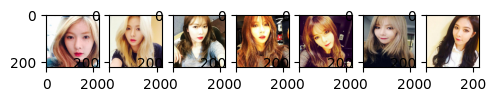

this is cluster 1


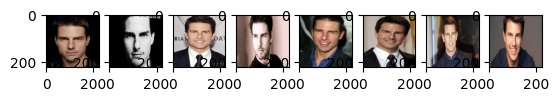

this is cluster 2


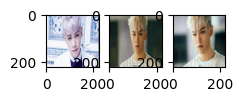

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import load_iris
from operator import itemgetter
import cv2
from pylab import *

# use K-mean to make classification
estimator = KMeans(n_clusters=3)
estimator.fit(list_image)
# classification cluster
label_pred = estimator.labels_
# get specific cluster
# "number" is to visualize how mang pictures
def show_cluster(cluster,number,label_pred,list_image):
    list_cluster= []
    image_list_index= []
    for i in range(len(label_pred)):
        if label_pred[i] == cluster:
           list_cluster.append(label_pred[i])
           image_list_index.append(i)
    plt.figure()
    print("this is cluster",cluster)
    for v in range(len(image_list_index[0:number])):
        j = v +1
        image = dic_image[image_list_index[0:number][v]]
        plt.subplot(4,8,j)
        plt.rcParams["axes.grid"]=False
        plt.imshow(image)
    plt.show()


show_cluster(0,8,label_pred,list_image)
show_cluster(1,8,label_pred,list_image)
show_cluster(2,8,label_pred,list_image)
